In [1]:
## NOTe that HELA never converged for GEMINI
# Uncomment the command below if you run this script separately. 

%run AnalysisFunctions.ipynb
apply_filter = "False"

C:\Users\hamda\AppData\Local\Temp\ipykernel_10564\1198573690.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ground_truth_depmap_hit = ground_truth_depmap_hit.replace({True: 1, False: 0})


,ground_truth
sorted_gene_pair,
A1BG_GP6,0.0
A1BG_IGSF1,0.0
A1BG_KIR2DL3,0.0
A1BG_LILRB3,0.0
A1BG_LILRB5,0.0
...,...
ZSWIM4_ZSWIM5,0.0
ZER1_ZYG11A,0.0
ZER1_ZYG11B,0.0


In [5]:
print("Running Parrish Analysis")


print(f"Apply Filter?: {apply_filter}")

if apply_filter.lower() == "true":
    filtered = "/Filtered"
    print("Compiling results with filtered pairs")
else:
    filtered = ""
    print("Compiling results with unfiltered pairs")

Running Parrish Analysis
Apply Filter?: False
Compiling results with unfiltered pairs


In [6]:
# In this file, I will analyses calculated scores for the Parrish screen

# Start loading calculated scores 
# For zdLFC, filtered is same as unfiltered because it doesnt filter out anything
zdLFC_Hela = pd.read_csv("../zdLFC Scripts/zdLFC Output/Parrish_Hela.csv")
zdLFC_Hela = zdLFC_Hela.rename(columns={zdLFC_Hela.columns[0]: 'GENE'})
zdLFC_Hela = zdLFC_Hela.set_index('GENE')


zdLFC_PC9 = pd.read_csv("../zdLFC Scripts/zdLFC Output/Parrish_PC9.csv")
zdLFC_PC9 = zdLFC_PC9.rename(columns={zdLFC_PC9.columns[0]: 'GENE'})
zdLFC_PC9 = zdLFC_PC9.set_index('GENE')

zdLFC = pd.concat([zdLFC_Hela, zdLFC_PC9], axis = 1)
zdLFC = -1 * zdLFC
zdLFC


,HeLa,PC9
GENE,,
AADAC_AADACL2,0.465426,0.815721
AADACL3_AADACL4,-0.617790,0.662263
ABCC1_ABCC3,0.244848,0.008251
ABCC8_ABCC9,-0.348282,0.395414
ABCD1_ABCD2,0.034017,-0.663730
...,...,...
ZNF503_ZNF703,0.036080,0.711393
ZNF143_ZNF76,1.095492,2.449984
ZNF419_ZNF773,-0.433768,-1.714544


In [7]:
orthrus = pd.read_csv("../Orthrus Scripts/OrthrusOutput" + filtered + "/parrish_orthrus.tsv", sep='\t')
orthrus['GENE'] = orthrus['gene1'] + "_" + orthrus['gene2']
orthrus = orthrus.filter(like='differential', axis=1).join(orthrus.filter(items=['GENE']))
orthrus = orthrus.rename(columns={'differential_combn_vs_single_PC9': 'PC9', 
                                  'differential_combn_vs_single_HeLa': 'HeLa'})
orthrus = orthrus.set_index('GENE')
orthrus = reindex_alphbetically(orthrus)
orthrus = orthrus * -1
orthrus


,PC9,HeLa
gene_pair,,
AADAC_AADACL2,0.138547,0.090578
AADACL3_AADACL4,0.059029,-0.167744
ABCC1_ABCC3,-0.045209,0.000839
ABCC8_ABCC9,0.081108,-0.086981
ABCD1_ABCD2,-0.124370,-0.023933
...,...,...
ZNF503_ZNF703,0.060178,0.027535
ZNF143_ZNF76,0.365820,0.088933
ZNF419_ZNF773,-0.369273,-0.057982


In [8]:
Hela_gemini_Sens_L = pd.read_csv("../Gemini Scripts/GeminiOutput" + filtered + "/Gemini_Parrish_HeLa_Sensitive.csv")
Hela_gemini_Sens_L.rename({ "Unnamed: 0": "gene_pair"}, inplace = True, axis = 1)
Hela_gemini_Sens_L['gene_pair'] = Hela_gemini_Sens_L['gene_pair'].replace(':', '_', regex=True)
Hela_gemini_Sens_L.set_index('gene_pair', inplace = True)
Hela_gemini_Sens_L  = reindex_alphbetically(Hela_gemini_Sens_L )

display(Hela_gemini_Sens_L) 



Hela_gemini_Strong = pd.read_csv("../Gemini Scripts/GeminiOutput" + filtered + "/Gemini_Parrish_HeLa_Strong.csv")
Hela_gemini_Strong.rename({ "Unnamed: 0": "gene_pair"}, inplace = True, axis = 1)
Hela_gemini_Strong['gene_pair'] = Hela_gemini_Strong['gene_pair'].replace(':', '_', regex=True)
Hela_gemini_Strong.set_index('gene_pair', inplace = True)

Hela_gemini_Strong  = reindex_alphbetically(Hela_gemini_Strong )#


display(Hela_gemini_Strong) 

PC9_gemini_Sens_L = pd.read_csv("../Gemini Scripts/GeminiOutput" + filtered + "/Gemini_Parrish_PC9_Sensitive.csv")
PC9_gemini_Sens_L.rename({ "Unnamed: 0": "gene_pair"}, inplace = True, axis = 1)
PC9_gemini_Sens_L['gene_pair'] = PC9_gemini_Sens_L['gene_pair'].replace(':', '_', regex=True)
PC9_gemini_Sens_L.set_index('gene_pair', inplace = True)
PC9_gemini_Sens_L  = reindex_alphbetically(PC9_gemini_Sens_L )

PC9_gemini_Sens_L 



PC9_gemini_Strong = pd.read_csv("../Gemini Scripts/GeminiOutput" + filtered + "/Gemini_Parrish_PC9_Strong.csv")
PC9_gemini_Strong.rename({ "Unnamed: 0": "gene_pair"}, inplace = True, axis = 1)
PC9_gemini_Strong['gene_pair'] = PC9_gemini_Strong['gene_pair'].replace(':', '_', regex=True)
PC9_gemini_Strong.set_index('gene_pair', inplace = True)

PC9_gemini_Strong  = reindex_alphbetically(PC9_gemini_Strong )#
PC9_gemini_Strong 

,HeLa_LTP
gene_pair,
AADAC_AADACL2,-0.450079
AADACL3_AADACL4,-0.252247
ABCC1_ABCC3,0.345748
ABCC8_ABCC9,-0.159402
ABCD1_ABCD2,-0.339524
...,...
ZNF503_ZNF703,-0.101845
ZNF143_ZNF76,0.639421
ZNF419_ZNF773,-0.188340


,HeLa_LTP
gene_pair,
AADAC_AADACL2,-0.450079
AADACL3_AADACL4,-0.252247
ABCC1_ABCC3,0.259017
ABCC8_ABCC9,-0.159402
ABCD1_ABCD2,-0.339524
...,...
ZNF503_ZNF703,-0.101845
ZNF143_ZNF76,0.216078
ZNF419_ZNF773,-0.188340


,PC9_LTP
gene_pair,
AADAC_AADACL2,-0.007339
AADACL3_AADACL4,0.022368
ABCC1_ABCC3,0.041127
ABCC8_ABCC9,-0.123466
ABCD1_ABCD2,-0.024889
...,...
ZNF503_ZNF703,-0.236353
ZNF143_ZNF76,0.100260
ZNF419_ZNF773,-0.059362


In [12]:
# Parrish doesnt filter out any pairs so filtered is same as unfiltered
parrish = pd.read_csv("../Parrish Score Scripts/ParrishOutput/Parrish_Parrish.csv")
parrish.set_index('paralog_pair', inplace = True)
parrish  = reindex_alphbetically(parrish )#

parrish = parrish * -1
parrish


,PC9,HeLa,PC9_fdr,HeLa_fdr
gene_pair,,,,
AADAC_AADACL2,0.221158,-0.004846,-0.067894,-0.977359
AADACL3_AADACL4,-0.006040,-0.081138,-0.973703,-0.422263
ABCC1_ABCC3,0.223133,0.058860,-0.053457,-0.489276
ABCC8_ABCC9,0.097640,-0.084255,-0.538113,-0.422263
ABCD1_ABCD2,0.077335,-0.068223,-0.524423,-0.586434
...,...,...,...,...
ZNF503_ZNF703,0.245543,0.056741,-0.091800,-0.305006
ZNF143_ZNF76,0.540678,0.094465,-0.001625,-0.640277
ZNF419_ZNF773,-0.329323,0.249431,-0.304366,-0.358697


(1030, 5)

(1030, 6)

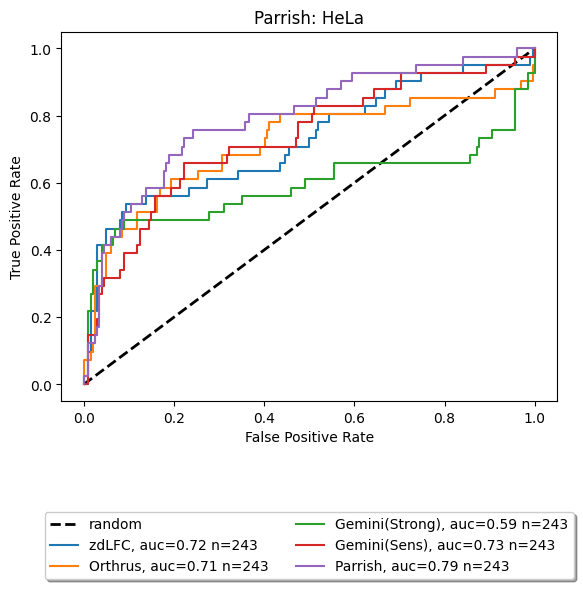

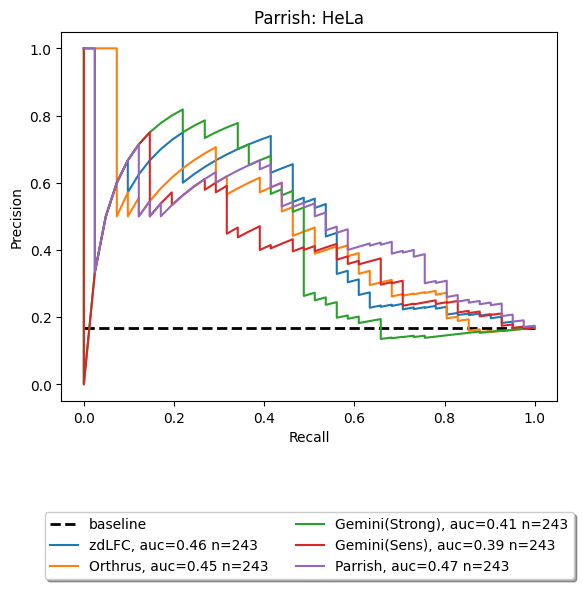

In [10]:
# HELA
Parrish_HeLa = pd.concat([zdLFC['HeLa'],
                          orthrus['HeLa'],
                          Hela_gemini_Strong['HeLa_LTP'],
                          Hela_gemini_Sens_L['HeLa_LTP'],
                          parrish['HeLa']], axis = 1, keys=scores)

results_Parrish_HeLa = Cell_Line_Analysis(Parrish_HeLa, 'HeLa', 'Parrish', 
                   scores,ground_truth_depmap_hit)



(1030, 5)

(1030, 6)

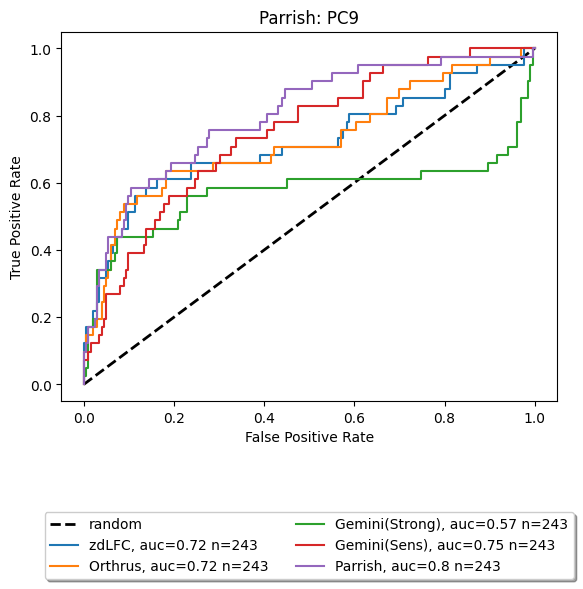

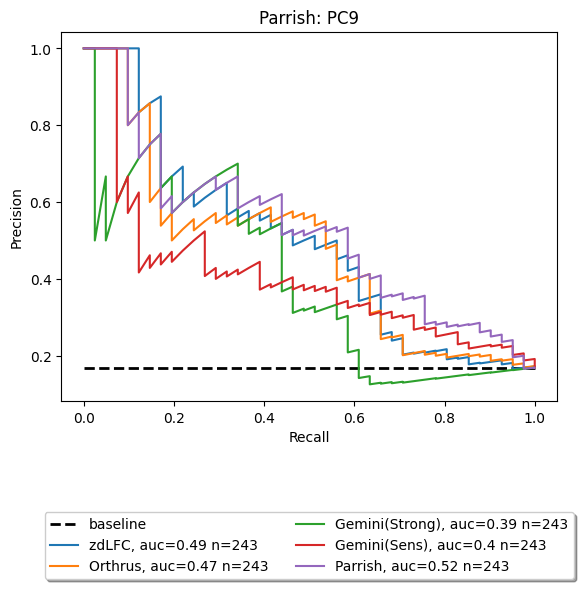

In [13]:
# PC9
Parrish_PC9 = pd.concat([zdLFC['PC9'],
                          orthrus['PC9'],                          
                          PC9_gemini_Strong['PC9_LTP'],
                            PC9_gemini_Sens_L['PC9_LTP'],
                          parrish['PC9']
                                  
                      ], axis = 1, keys=scores)
results_Parrish_PC9 = Cell_Line_Analysis(Parrish_PC9, 'PC9', 'Parrish', 
                   scores, ground_truth_depmap_hit)



In [12]:
full_list = [results_Parrish_PC9, results_Parrish_HeLa]

roc, pr = ConvertResultsToDF(full_list )
roc
## Write results to a file
roc.to_csv("Output" + filtered + "/Parrish_ROC_DepMapHits.csv", index=False)
pr.to_csv("Output"  + filtered +  "/Parrish_PR_DepMapHits.csv", index=False)


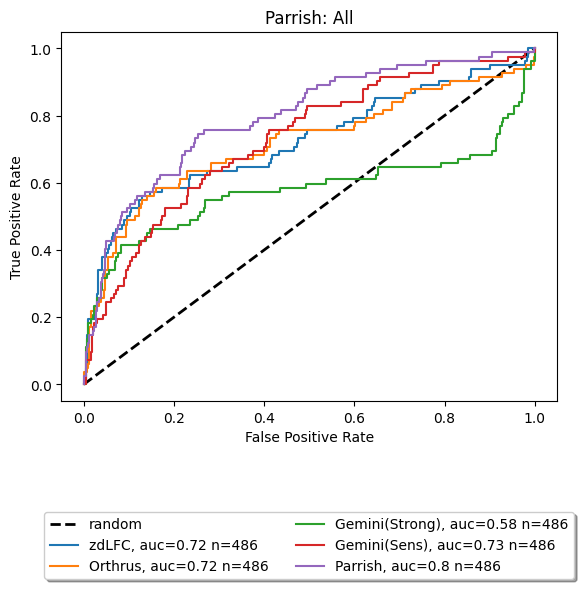

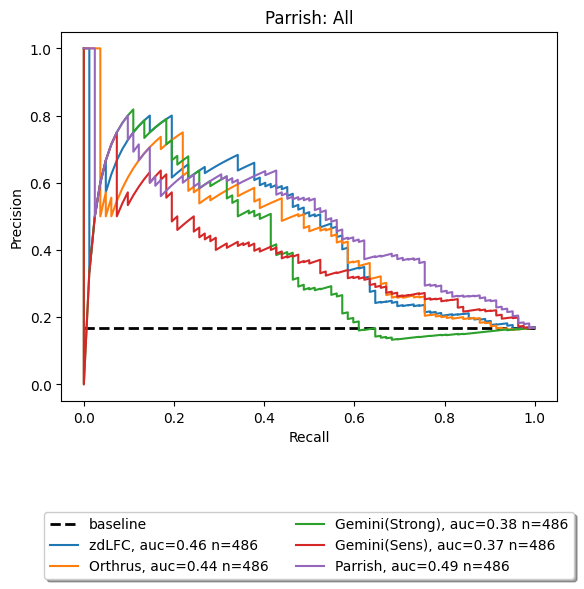

In [13]:
parrish_all = pd.concat([Parrish_HeLa, Parrish_PC9])
results_parrish_all = Cell_Line_Analysis(parrish_all, 'All', 'Parrish', 
                   scores, ground_truth_depmap_hit)

roc_all, pr_all = ConvertResultsToDF([results_parrish_all] )
## Write results to a file
roc_all.to_csv("Output" + filtered + "/Parrish_All_ROC_DepMapHits.csv", index=False)
pr_all.to_csv("Output" + filtered+ "/Parrish_All_PR_DepMapHits.csv", index=False)


(1030, 5)

(1281, 6)

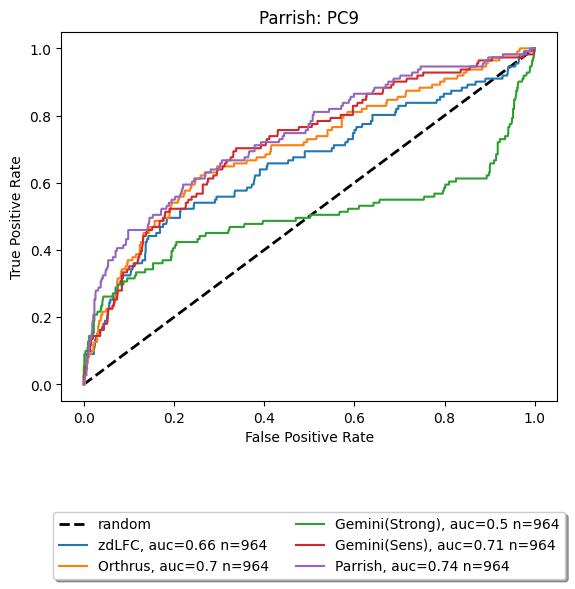

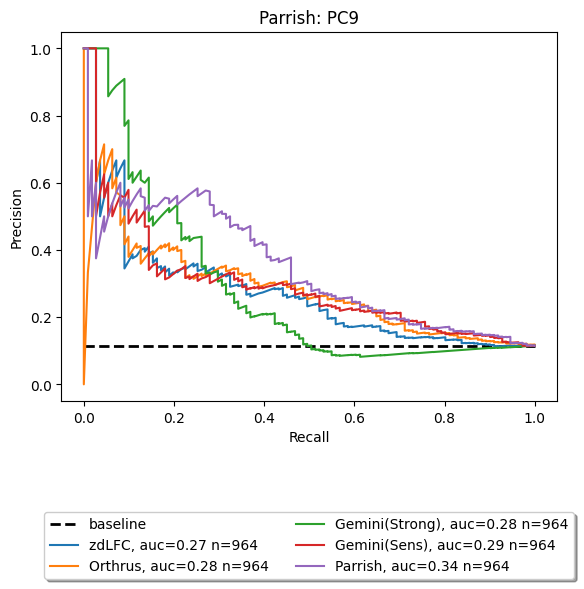

(1030, 5)

(1281, 6)

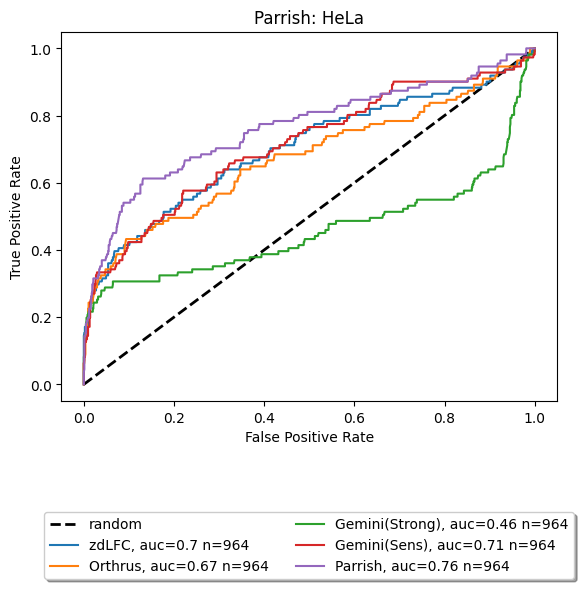

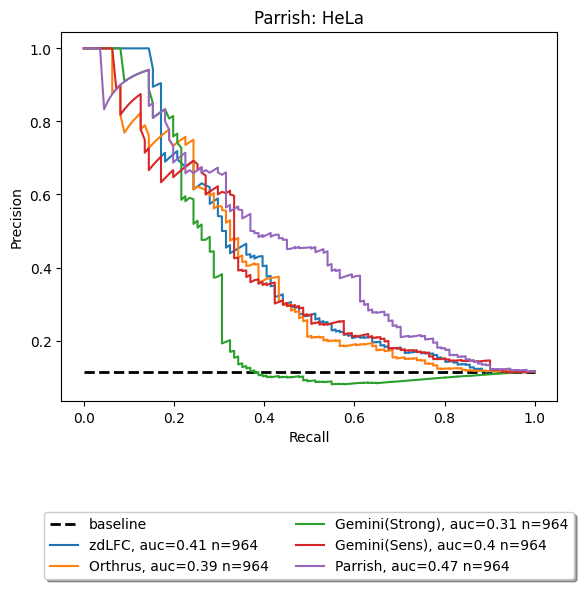

NameError: name 'parrish_all' is not defined

In [14]:
results_Parrish_PC9_Koferle = Cell_Line_Analysis(Parrish_PC9, 'PC9', 'Parrish', 
                   scores, Koferle)
results_Parrish_HeLa_Koferle = Cell_Line_Analysis(Parrish_HeLa, 'HeLa', 'Parrish', 
                   scores,Koferle)

full_list = [results_Parrish_PC9_Koferle, results_Parrish_HeLa_Koferle]

roc_Koferle, pr_Koferle = ConvertResultsToDF(full_list)

## Write results to a file
roc_Koferle.to_csv("Output" + filtered + "/Parrish_ROC_Koferle.csv", index=False)
pr_Koferle.to_csv("Output" + filtered + "/Parrish_PR_Koferle.csv", index=False)
# combine all cell lines and then repeat analysis
results_parrish_all_Koferle = Cell_Line_Analysis(parrish_all, 'All', 'Parrish', scores, Koferle)

roc_all_Koferle, pr_all_Koferle= ConvertResultsToDF([results_parrish_all_Koferle] )
## Write results to a file
roc_all_Koferle.to_csv("Output" + filtered + "/Parrish_All_ROC_Koferle.csv", index=False)
pr_all_Koferle.to_csv("Output" + filtered + "/Parrish_All_PR_Koferle.csv", index=False)

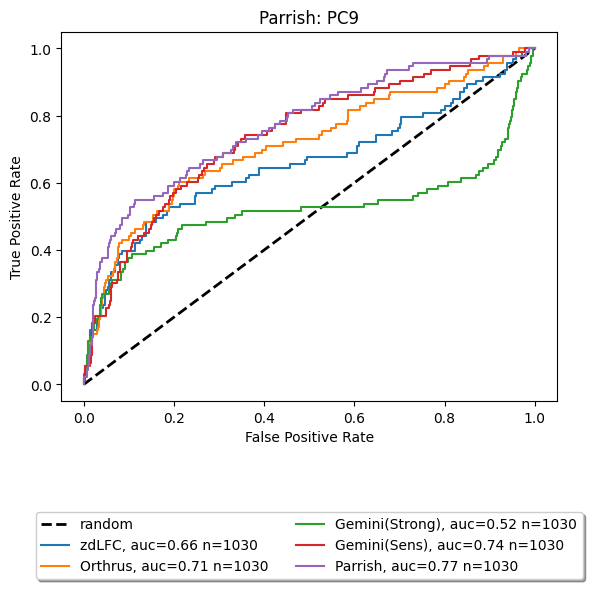

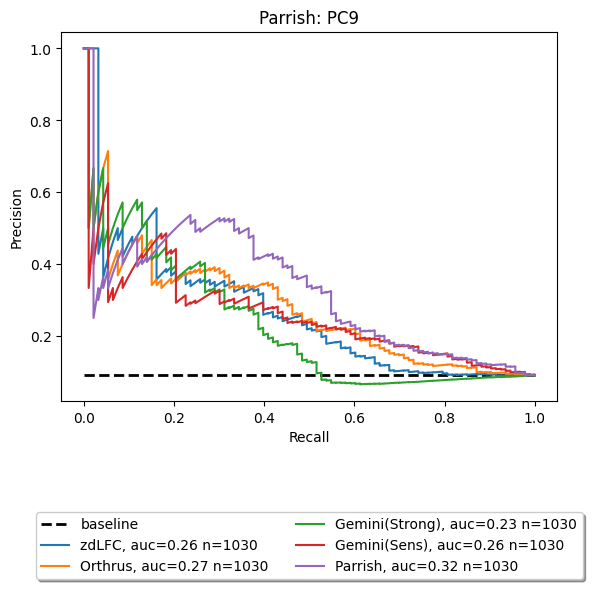

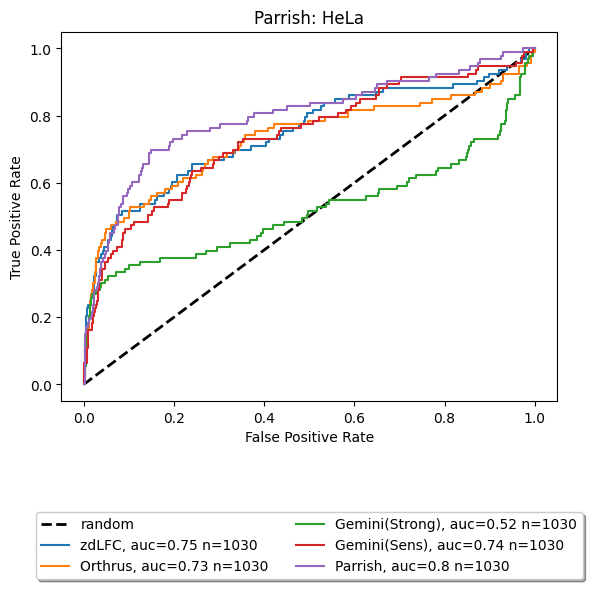

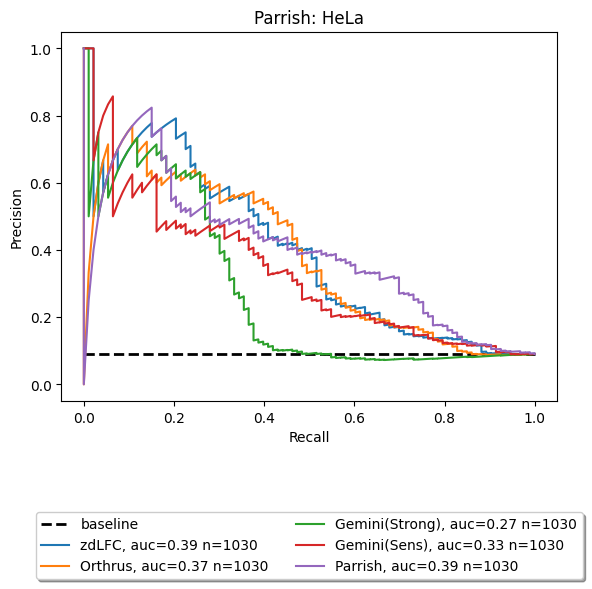

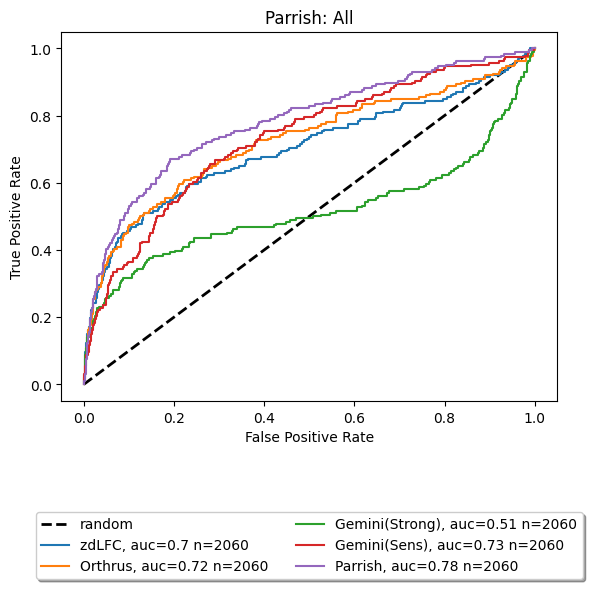

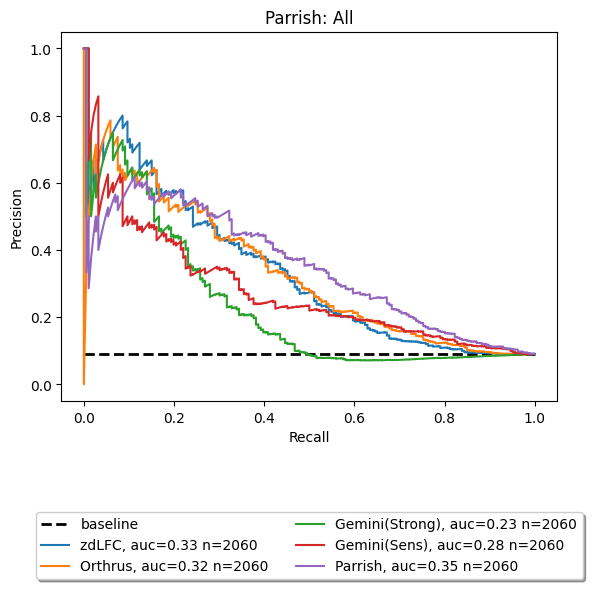

In [15]:
results_Parrish_PC9_bacon = Cell_Line_Analysis_bacon(Parrish_PC9, 'PC9', 'Parrish', 
                   scores, bacon)
results_Parrish_HeLa_bacon = Cell_Line_Analysis_bacon(Parrish_HeLa, 'HeLa', 'Parrish', 
                   scores,bacon)
parrish_all = pd.concat([Parrish_HeLa, Parrish_PC9])
full_list = [results_Parrish_PC9_bacon, results_Parrish_HeLa_bacon]

roc_bacon, pr_bacon = ConvertResultsToDF(full_list)

## Write results to a file
roc_bacon.to_csv("Output" + filtered + "/Parrish_ROC_bacon.csv", index=False)
pr_bacon.to_csv("Output" + filtered + "/Parrish_PR_bacon.csv", index=False)
# combine all cell lines and then repeat analysis
results_parrish_all_bacon = Cell_Line_Analysis_bacon(parrish_all, 'All', 'Parrish', scores, bacon)

roc_all_bacon, pr_all_bacon= ConvertResultsToDF([results_parrish_all_bacon] )
## Write results to a file
roc_all_bacon.to_csv("Output" + filtered + "/Parrish_All_ROC_bacon.csv", index=False)
pr_all_bacon.to_csv("Output" + filtered + "/Parrish_All_PR_bacon.csv", index=False)


In [16]:
parrish_all.corr(method = "spearman").to_csv("Output" + filtered + "\Comparison\Parrish_Correlations.csv")
Parrish_PC9_ = jaccard_similarity(Parrish_PC9, 0.95)
Parrish_PC9_.to_csv("Output" + filtered + "\Comparison\Parrish_PC9_Jaccard.csv")
Parrish_HeLa_ = jaccard_similarity(Parrish_HeLa, 0.95)
Parrish_HeLa_.to_csv("Output" + filtered + "\Comparison\Parrish_HeLa_Jaccard.csv")

Parrish_Jaccard = (Parrish_HeLa_ + Parrish_HeLa_) / 2
Parrish_Jaccard.to_csv("Output" + filtered + "\Comparison\Parrish_Jaccard.csv")

Best AUROC Method: Parrish
Best AUPR Method: Parrish


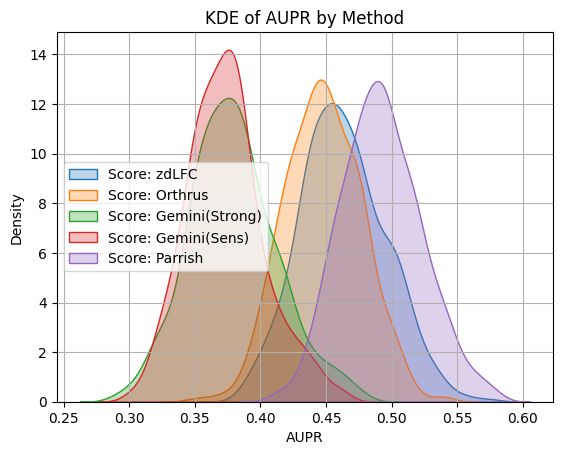

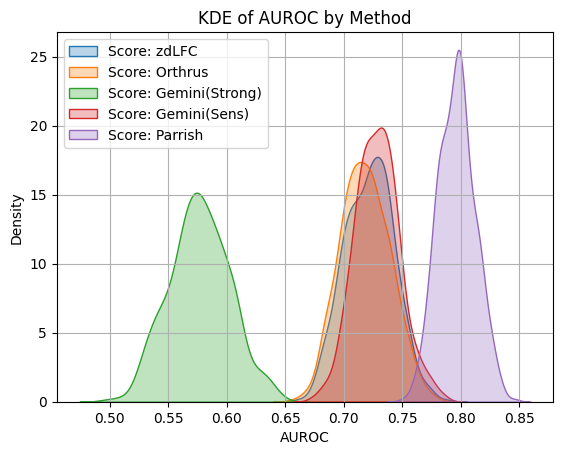

,method,p_value,fdr,bonferroni,significant_bh,signicant_bonferroni
1,Gemini(Strong),0.000000e+00,0.000000e+00,0.000000e+00,True,True
2,Orthrus,0.000000e+00,0.000000e+00,0.000000e+00,True,True
3,zdLFC,0.000000e+00,0.000000e+00,0.000000e+00,True,True
0,Gemini(Sens),2.625191e-270,2.625191e-270,1.050076e-269,True,True


,method,p_value,fdr,bonferroni,significant_bh,signicant_bonferroni
0,Gemini(Sens),0.000000e+00,0.000000e+00,0.000000e+00,True,True
1,Gemini(Strong),5.351908e-295,1.070382e-294,2.140763e-294,True,True
2,Orthrus,6.072824e-185,8.097098e-185,2.429130e-184,True,True
3,zdLFC,7.854211e-138,7.854211e-138,3.141684e-137,True,True


In [17]:
results, aupr_test, auroc_test = Resampling_analysis(parrish_all, 'All', 'Parrish', scores, ground_truth_depmap_hit , n_repeats=500, frac=0.75)
display(auroc_test)
display(aupr_test)


Best AUROC Method: Parrish
Best AUPR Method: Parrish


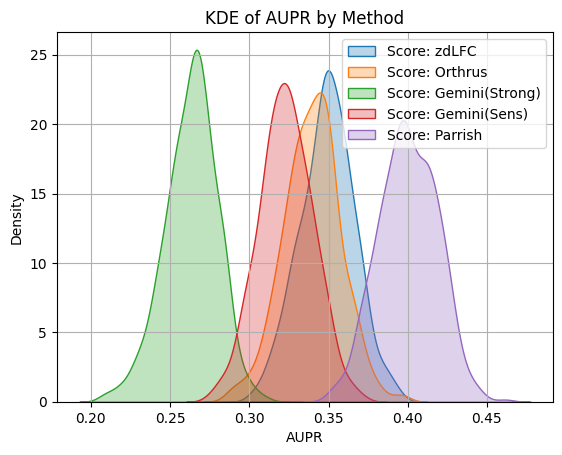

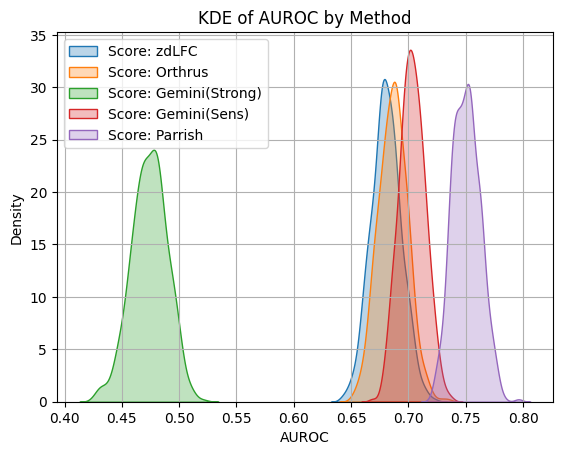

,method,p_value,fdr,bonferroni,significant_bh,signicant_bonferroni
1,Gemini(Strong),0.000000e+00,0.000000e+00,0.000000e+00,True,True
2,Orthrus,0.000000e+00,0.000000e+00,0.000000e+00,True,True
3,zdLFC,0.000000e+00,0.000000e+00,0.000000e+00,True,True
0,Gemini(Sens),1.444363e-304,1.444363e-304,5.777451e-304,True,True


,method,p_value,fdr,bonferroni,significant_bh,signicant_bonferroni
0,Gemini(Sens),0.000000e+00,0.000000e+00,0.000000e+00,True,True
1,Gemini(Strong),0.000000e+00,0.000000e+00,0.000000e+00,True,True
2,Orthrus,0.000000e+00,0.000000e+00,0.000000e+00,True,True
3,zdLFC,7.473571e-316,7.473571e-316,2.989428e-315,True,True


In [18]:
results, aupr_test, auroc_test = Resampling_analysis(parrish_all, 'All', 'Parrish', scores, Koferle , n_repeats=500, frac=0.75)
display(auroc_test)
display(aupr_test)
